In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from matplotlib.image import imread
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
base_dir = '/kaggle/input/gender-recognizer/dataset'
men_dir = os.path.join(base_dir, 'MEN')
women_dir = os.path.join(base_dir, 'WOMAN')

Load the images and labels

In [7]:
import cv2
def load_images_and_labels(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img,(128,128))
            images.append(img)
            labels.append(label)
    return images, labels

men_images, men_labels = load_images_and_labels(men_dir, 0)
women_images, women_labels = load_images_and_labels(women_dir, 1)

Invalid SOS parameters for sequential JPEG


In [9]:
images = np.array(men_images + women_images)
labels = np.array(men_labels + women_labels)

In [13]:
normalised_image = images / 255.0

In [15]:
labels = to_categorical(labels, num_classes=2)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [18]:
model = Sequential()
model.add(Conv2D(128, (3,3),activation='relu', input_shape=(128,128,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 126, 126, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,642 (12.62 MB)

 Trainable params: 3,308,642 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5140 - loss: 80.1960 - val_accuracy: 0.5356 - val_loss: 0.6925
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5142 - loss: 0.7013 - val_accuracy: 0.5816 - val_loss: 0.6917
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5701 - loss: 0.6625 - val_accuracy: 0.5565 - val_loss: 0.6932
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6382 - loss: 0.6125 - val_accuracy: 0.5816 - val_loss: 0.6933
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6749 - loss: 0.5795 - val_accuracy: 0.5983 - val_loss: 0.7246
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6843 - loss: 0.5821 - val_accuracy: 0.6067 - val_loss: 0.7289
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7252 - loss: 0.4794 - val_accuracy: 0.5816 - val_loss: 0.7557
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7544 - loss: 0.4420 - val_accuracy: 0.5858 - 

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.6719 - loss: 2.1096
Test Accuracy: 0.6945606470108032


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step


In [22]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       134
           1       0.62      0.76      0.69       105

    accuracy                           0.69       239
   macro avg       0.70      0.70      0.69       239
weighted avg       0.71      0.69      0.70       239



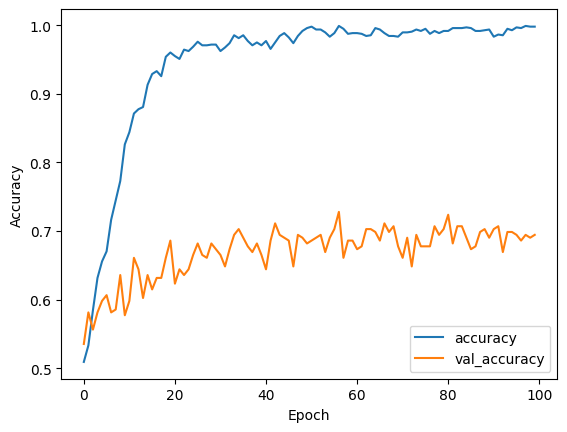

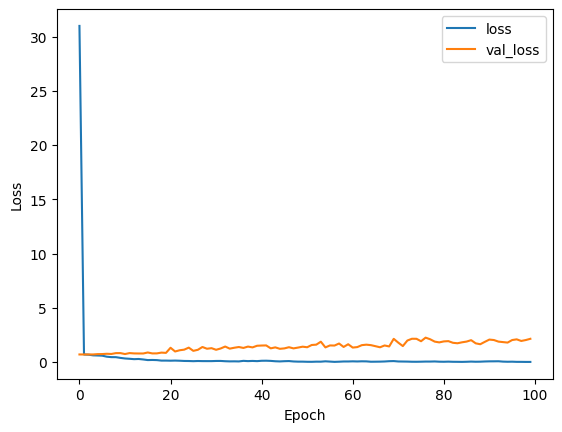

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

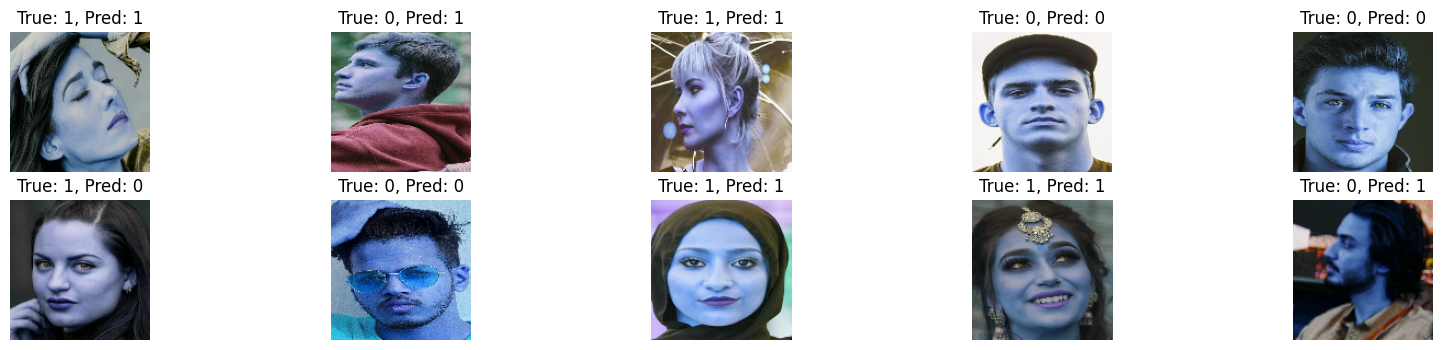

In [28]:
# Show 10 sample predictions
def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    indices = np.random.choice(range(len(X)), num_samples, replace=False)
    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {np.argmax(y_true[idx])}, Pred: {np.argmax(y_pred[idx])}")
        plt.axis('off')
    plt.show()

plot_sample_predictions(x_test, y_test, y_pred)

Not enoough accuracy